In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dsp_azure.csv')

In [3]:
df.head()

,device_type,os_vendor,os_name,os_version,browser_name,browser_version,location_region,location_state,app_name,site_name,site_link,data_type,exchange,carrier,captured_time,device_screen_height,device_screen_width,device_screen_pixel_ratio
0,Phone,Google,android,9,Chrome Mobile,75.0,NaN,Abuja,NaN,NaN,https://www.newsnow.co.uk/h/Sport/Football,Bid,adx,NaN,2019-08-19T07:44:12.095,720.0,360.0,2.000
1,Phone,Google,android,9,Chrome Mobile,76.0,NaN,Ikeja,NaN,NaN,https://www.newsnow.co.uk/h/Sport/Football/Pre...,Bid,adx,Zain,2019-08-19T20:04:26.372,720.0,360.0,2.000
2,Phone,Google,android,8.1.1,Chrome Mobile,75.0,South West,Lagos,NaN,www.goal.com,https://www.goal.com/en/news/tammy-abraham-sho...,Bid,adx,/75,2019-08-21T09:31:24.054,720.0,360.0,2.000
3,Phone,Google,android,5.1.1,Samsung Internet,9.0,South West,Lagos,NaN,www.newsnow.co.uk,https://www.newsnow.co.uk/h/Sport/Football/Pre...,Bid,adx,/54,2019-08-20T17:10:05.505,640.0,360.0,4.000
4,Phone,Google,android,9,Chrome Mobile,72.0,South West,Lagos,NaN,www.legit.ng,https://www.legit.ng/1252793-bbnaija2019-ebuka...,Bid,adx,/,2019-08-13T18:26:28.015,732.0,412.0,2.625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201858 entries, 0 to 201857
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   device_type                201858 non-null  object 
 1   os_vendor                  200643 non-null  object 
 2   os_name                    200992 non-null  object 
 3   os_version                 197915 non-null  object 
 4   browser_name               201566 non-null  object 
 5   browser_version            199758 non-null  float64
 6   location_region            149816 non-null  object 
 7   location_state             195423 non-null  object 
 8   app_name                   73894 non-null   object 
 9   site_name                  31572 non-null   object 
 10  site_link                  127688 non-null  object 
 11  data_type                  201858 non-null  object 
 12  exchange                   201858 non-null  object 
 13  carrier                    13

In [5]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# df.plot(kind = 'scatter', x = 'device_screen_pixel_ratio', y ='device_screen_height', figsize = (8,8));

## Data Cleaning

In [6]:
# fill all missing values in the necessary columns
cat_cols = ['os_name', 'browser_name', 'location_state', 'carrier']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())

# Numerical columns
num_cols = ['browser_version', 'device_screen_height', 'device_screen_width', 'device_screen_pixel_ratio']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

According to the dataset, the maximum device screen width of phones are higher than that of  personal computers and even connected TV

In [7]:
# maximum device screen width for personal computer
df.where(df['device_type'] == 'Personal Computer').groupby('device_type')['device_screen_width'].max()

device_type
Personal Computer    488.325156
Name: device_screen_width, dtype: float64

In [8]:
# maximum device screen width for Phone
df.where(df['device_type'] == 'Phone').groupby('device_type')['device_screen_width'].max()

device_type
Phone    2560.0
Name: device_screen_width, dtype: float64

In [9]:
# maximum device screen width for Tablet
df.where(df['device_type'] == 'Tablet').groupby('device_type')['device_screen_width'].max()

device_type
Tablet    2560.0
Name: device_screen_width, dtype: float64

In [10]:
# maximum device screen width for Connected TV
df.where(df['device_type'] == 'Connected TV').groupby('device_type')['device_screen_width'].max()

device_type
Connected TV    1920.0
Name: device_screen_width, dtype: float64

## Feature Engineering

In [11]:
# Concat two columns
df['os_version'] = df['os_version'].astype(str)
df['os_name_version'] = df['os_name'] + " " + df['os_version']

In [12]:
# Concat two columns
df['browser_version'] = df['browser_version'].astype(str)
df['browser_name_version'] = df['browser_name'] + " " + df['browser_version']

- We can calculate the device screen diagonal by pythagoras theorem , we then categorize the result  by dividing using pd.cut

In [13]:
device_screen_height_sqd = np.square(df['device_screen_height'])
device_screen_width_sqd = np.square(df['device_screen_width'])
df['device_screen_diagonal'] = np.sqrt(device_screen_height_sqd + device_screen_width_sqd)

use pd.cut to divide the values of the device_screen_width into ordinal categorical groups

In [14]:
# define bin edges to create groups 
df['device_screen_width'].describe()

count    201858.000000
mean        488.325156
std         204.821164
min         122.000000
25%         360.000000
50%         375.000000
75%         600.000000
max        2560.000000
Name: device_screen_width, dtype: float64

In [15]:
# fill the bin edges with values from 75% and max respectively
bins = [0.0, 600.0, 2560.0]
names = ['smartphone', 'other_device']

Convert device_screen_width to a categorical columns of smartphone and other_device categories

In [16]:
# Create screen_type_width column that holds the categorical data of device_screen_diagonal
df['screen_type_width'] = pd.cut(df['device_screen_width'], bins, labels = names, include_lowest=True)

# check to ensure that the column was created
df['screen_type_width'].dtype

CategoricalDtype(categories=['smartphone', 'other_device'], ordered=True)

In [17]:
# def device(dataframe):
#     '''
#     creates a column for whether a device is a smartphone or not
#     '''
#     smart = []
#     for row in df['screen_type_width']:
#         if row != 'mobile_phone':
#             smart.append(0)
#         else:
#             smart.append(1)
        
#     df['device_width'] = smart
#     return df  

In [18]:
df.screen_type_width.head()

0    smartphone
1    smartphone
2    smartphone
3    smartphone
4    smartphone
Name: screen_type_width, dtype: category
Categories (2, object): ['smartphone' < 'other_device']

## Data Cleaning(Cont.)

In [19]:
# Breakdown the datetime column
df['captured_time'] = pd.to_datetime(df['captured_time'])

df['captured_year'] = pd.to_datetime(df['captured_time']).dt.year

df['captured_month'] =  pd.to_datetime(df['captured_time']).dt.strftime('%B')

df['captured_day'] = pd.to_datetime(df['captured_time']).dt.day

In [20]:
# Drop columns not needed for prediction
drop_cols = ['device_type', 'os_name', 'os_version', 'browser_name', 'browser_version', 'device_screen_height', 'device_screen_width', 'device_screen_pixel_ratio', 'location_region', 'captured_time', 'app_name', 'site_name', 'site_link']
df.drop(columns = drop_cols, axis = 1, inplace = True)

In [21]:
df.head()

,os_vendor,location_state,data_type,exchange,carrier,os_name_version,browser_name_version,device_screen_diagonal,screen_type_width,captured_year,captured_month,captured_day
0,Google,Abuja,Bid,adx,/,android 9,Chrome Mobile 75.0,804.984472,smartphone,2019,August,19
1,Google,Ikeja,Bid,adx,Zain,android 9,Chrome Mobile 76.0,804.984472,smartphone,2019,August,19
2,Google,Lagos,Bid,adx,/75,android 8.1.1,Chrome Mobile 75.0,804.984472,smartphone,2019,August,21
3,Google,Lagos,Bid,adx,/54,android 5.1.1,Samsung Internet 9.0,734.302390,smartphone,2019,August,20
4,Google,Lagos,Bid,adx,/,android 9,Chrome Mobile 72.0,839.980952,smartphone,2019,August,13


In [22]:
df.dropna(axis = 0, inplace = True)

In [23]:
df.isna().sum()

os_vendor                 0
location_state            0
data_type                 0
exchange                  0
carrier                   0
os_name_version           0
browser_name_version      0
device_screen_diagonal    0
screen_type_width         0
captured_year             0
captured_month            0
captured_day              0
dtype: int64

In [24]:
len(df.columns)

12

In [25]:
df['screen_type_width'] = df['screen_type_width'].astype('str')
df['screen_type_width'].dtype

dtype('O')

In [26]:
# Substitute the classes in the target column with 0's and 1's
target_col = {'Bid': 0, 'Click': 1}
df['data_type'] = df['data_type'].map(target_col)

In [27]:
df['data_type'].value_counts()

0    129317
1      1757
Name: data_type, dtype: int64

In [28]:
# define predictor data
X = df.drop(['data_type'], axis = 1)

# define target data
y = df['data_type']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131074 entries, 0 to 201857
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   os_vendor               131074 non-null  object 
 1   location_state          131074 non-null  object 
 2   data_type               131074 non-null  int64  
 3   exchange                131074 non-null  object 
 4   carrier                 131074 non-null  object 
 5   os_name_version         131074 non-null  object 
 6   browser_name_version    131074 non-null  object 
 7   device_screen_diagonal  131074 non-null  float64
 8   screen_type_width       131074 non-null  object 
 9   captured_year           131074 non-null  int64  
 10  captured_month          131074 non-null  object 
 11  captured_day            131074 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 13.0+ MB


In [30]:
# # Transform all the categorical ordinal data column(label encoding)
# from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# # create object of Ordinalencoding
# encoder= OrdinalEncoder()
# # transform predictor data
# X = encoder.fit_transform(X)


# # create object of labelencoding
# le= LabelEncoder()
# # transform target data
# y = le.fit_transform(y)
# # model_df = pd.get_dummies(df)

In [31]:
# # split dataset into train and test set
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 1)

In [32]:
# # Transform all the categorical ordinal data column(label encoding)
# from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# # create object of Ordinalencoding
# encoder= OrdinalEncoder()
# # transform predictor data
# encoder.fit(X_train)
# X_train = encoder.transform(X_train)
# X_test = encoder.fit_transform(X_test)


# # create object of labelencoding
# le= LabelEncoder()
# # transform target data
# le.fit(y_train)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)
# # model_df = pd.get_dummies(df)

In [33]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [34]:
# X_test[:5, :]

In [35]:
# y_train[:5]

In [30]:
from collections import Counter
Counter(y)

Counter({0: 129317, 1: 1757})

<AxesSubplot:ylabel='data_type'>

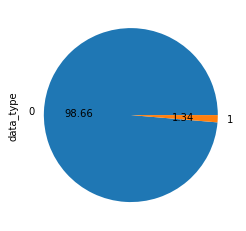

In [37]:
# Show pie plot
y.value_counts().plot.pie(autopct='%.2f')

# Class Balancing 

In [21]:
# Install Imbalanced-learn
# !pip install -U imbalanced-learn

## Random Oversampling

In [23]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state = 42)
# # ros = RandomOverSampler(sampling_strategy='not majority')
# X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [51]:
# y_train_ros.value_counts()

## Random Undersampling

In [25]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy='not minority')
# X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [52]:
# y_train_rus.value_counts()

## Model Building with Oversampling

In [55]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(random_state = 0).fit(X_train_ros, y_train_ros)

In [29]:
# y_pred = lr.predict(X_test)

In [53]:
# lr.score(X_test, y_test)

## Model Performance

SMOTE (Synthetic Minority Over-sampling Technique)
This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset.

Use SMOTE algorithm for Oversampling

Oversample first then split to train and test set

In [31]:
# split dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78644, 11), (78644,), (52430, 11), (52430,))

In [32]:
# Transform all the categorical ordinal data column(label encoding)
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# create object of Ordinalencoding
encoder= OrdinalEncoder()
# transform predictor data
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.fit_transform(X_test)


# create object of labelencoding
le= LabelEncoder()
# transform target data
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [33]:
X_train.shape, y_train.shape

((78644, 11), (78644,))

In [35]:

# from collections import Counter
# from imblearn.over_sampling import SMOTE
# # summarize class distribution
# print(Counter(y_train))
# # define oversample strategy
# oversample = SMOTE(sampling_strategy=0.5)
# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(X_train, y_train)
# # summarize class distribution
# print(Counter(y_over))

Counter({0: 77605, 1: 1039})
Counter({0: 77605, 1: 38802})


In [63]:
from imblearn.combine import SMOTEENN

# summarize class distribution
print(Counter(y_train))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 77605, 1: 1039})
Counter({0: 75193, 1: 34575})


In [49]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=150)
# model.fit(X_over, y_over)
# # predict on test set
# y_pred = model.predict(X_test)

In [47]:
# from sklearn import metrics
# print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.91     51712
           1       0.07      0.78      0.12       718

    accuracy                           0.84     52430
   macro avg       0.53      0.81      0.52     52430
weighted avg       0.98      0.84      0.90     52430



In [62]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression((penalty='l1', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=5, solver='liblinear', max_iter=200, multi_class='auto', verbose=5, warm_start=False, n_jobs=None, l1_ratio=None)
# model.fit(X_over, y_over)
# # predict on test set
# y_pred = model.predict(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', class_weight=dict, random_state=0, solver='sag', max_iter=200, verbose=5)
model.fit(X_over, y_over)
# predict on test set
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 9 seconds


C:\Users\Sofiyah\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished


In [67]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     51712
           1       0.06      0.76      0.12       718

    accuracy                           0.84     52430
   macro avg       0.53      0.80      0.51     52430
weighted avg       0.98      0.84      0.90     52430



In [34]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [35]:
# define predictor data
X = df.drop(['data_type'], axis = 1)

# define target data
y = df['data_type']

In [36]:
# StandardScaler is used to remove the outliners
std_slc = StandardScaler()

In [37]:
# Principal Component Analysis(PCA) which will reduce the dimension 
# of features by creating new features which have most of the varience of the original data.
pca = decomposition.PCA()

In [38]:
logistic_Reg = LogisticRegression()

In [39]:
# create an object pipe to create a pipeline for all the three objects std_scl, pca and logistic_Reg.
pipe = Pipeline(steps=[('std_slc', std_slc), ('pca', pca), ('logistic_Reg', logistic_Reg)])

In [40]:
# 'n_components' signifies the number of components to keep after reducing the dimension.
n_components = list(range(1,X.shape[1]+1,1))

In [41]:
# set C and penalty  as a list of values to be optimised by GridSearchCV form which GridSearchCV will select the best value of parameter.
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [42]:
# create a dictionary to set all the parameters options for different modules.
parameters = dict(pca__n_components=n_components, logistic_Reg__C=C, logistic_Reg__penalty=penalty)

In [43]:
# creaate an object clf_GS for GridSearchCV and fitting the dataset i.e X and y
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

C:\Users\Sofiyah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5500 fits failed out of a total of 5500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Sofiyah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users

ValueError: could not convert string to float: 'Google'

In [ ]:
# display the values of hyperparameters as a result.
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])